<a href="https://colab.research.google.com/github/Imadittyaa/coffee-sales/blob/coffee-sales/coffee_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
d1=pd.read_csv('https://raw.githubusercontent.com/Imadittyaa/coffee-sales/main/index_1.csv')
d2=pd.read_csv('https://raw.githubusercontent.com/Imadittyaa/coffee-sales/main/index_2.csv')
data=pd.concat([d1,d2],ignore_index=True)
data.shape

(3899, 6)

# Infomation of data

In [ ]:
data.head(n=21)

,date,datetime,cash_type,card,money,coffee_name
0,3/1/2024,3/1/2024 10:15,card,ANON-0000-0000-0001,38.7,Latte
1,3/1/2024,3/1/2024 12:19,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,3/1/2024,3/1/2024 12:20,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,3/1/2024,3/1/2024 13:46,card,ANON-0000-0000-0003,28.9,Americano
4,3/1/2024,3/1/2024 13:48,card,ANON-0000-0000-0004,38.7,Latte
5,3/1/2024,3/1/2024 15:39,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,3/1/2024,3/1/2024 16:19,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,3/1/2024,3/1/2024 18:39,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,3/1/2024,3/1/2024 19:22,card,ANON-0000-0000-0008,38.7,Cocoa
9,3/1/2024,3/1/2024 19:23,card,ANON-0000-0000-0008,33.8,Americano with Milk


# Some operations on data

In [ ]:
data['coffee_name']=data['coffee_name'].str.title()
data['cash_type']=data['cash_type'].str.lower()

In [ ]:
data.rename(columns={'datetime':'time','card':'card_N','money':'price'},inplace=True)
data['time']=data['time'].str[-5:]

In [ ]:
data['date']=pd.to_datetime(data['date'],errors='coerce')

In [ ]:
cash_data=data[data['cash_type']=='cash'].reset_index(drop=True)
card_data=data[data['cash_type']=='card'].reset_index(drop=True)

**Cleared coffee sales data**

In [ ]:
data.head(n=21)

,date,time,cash_type,card_N,price,coffee_name
0,2024-03-01,10:15,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,12:19,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,12:20,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,13:46,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,13:48,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,15:39,card,ANON-0000-0000-0005,33.8,Americano With Milk
6,2024-03-01,16:19,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,18:39,card,ANON-0000-0000-0007,33.8,Americano With Milk
8,2024-03-01,19:22,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,19:23,card,ANON-0000-0000-0008,33.8,Americano With Milk


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3898 non-null   datetime64[ns]
 1   time         3898 non-null   object        
 2   cash_type    3898 non-null   object        
 3   card_N       3547 non-null   object        
 4   price        3898 non-null   float64       
 5   coffee_name  3896 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 182.9+ KB


**In dataframe:**
   * *There are 7 column in which:*
   * **date**
   * **time**
   * **cash_tye(Payment-type)**
   * **card_N(if payment by card then card number)**
   * **price**
   * **coffee_name**

# Data divide on basis of payment method

* **cash_data actually denote to data on basis of payment by cash and card_data actually data on basis of payment by card**

In [ ]:
cash_data.head(n=21)

,date,time,cash_type,card_N,price,coffee_name
0,2024-03-02,10:30,cash,NaN,40.0,Latte
1,2024-03-03,10:10,cash,NaN,40.0,Latte
2,2024-03-06,12:30,cash,NaN,35.0,Americano With Milk
3,2024-03-07,10:08,cash,NaN,40.0,Latte
4,2024-03-07,11:25,cash,NaN,40.0,Latte
5,2024-03-09,11:49,cash,NaN,40.0,Hot Chocolate
6,2024-03-10,7:44,cash,NaN,30.0,Americano
7,2024-03-10,7:45,cash,NaN,35.0,Americano With Milk
8,2024-03-10,10:06,cash,NaN,40.0,Latte
9,2024-03-10,17:51,cash,NaN,35.0,Americano With Milk


In [ ]:
len(cash_data)

169

* **sales by cash payment method is 169**

In [ ]:
card_data.head(n=21)

,date,time,cash_type,card_N,price,coffee_name
0,2024-03-01,10:15,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,12:19,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,12:20,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,13:46,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,13:48,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,15:39,card,ANON-0000-0000-0005,33.8,Americano With Milk
6,2024-03-01,16:19,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,18:39,card,ANON-0000-0000-0007,33.8,Americano With Milk
8,2024-03-01,19:22,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,19:23,card,ANON-0000-0000-0008,33.8,Americano With Milk


In [ ]:
len(card_data)

3729

* **Sales by card payment method is 3729**

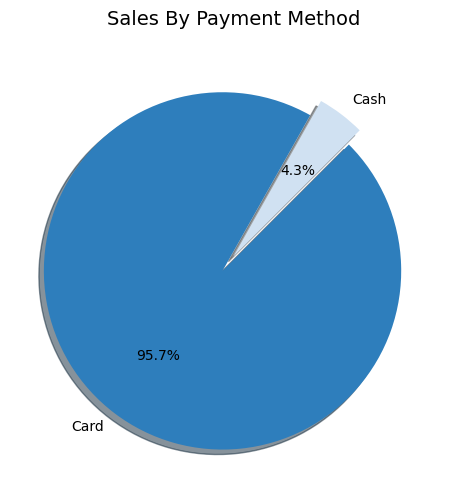

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(
    [len(cash_data),len(card_data)],
    labels=['Cash','Card'],
    autopct='%1.1f%%',
    startangle=45,
    colors=plt.get_cmap('Blues')(np.linspace(0.2, 0.7, 2)),
    shadow=True,
    explode=(0, 0.1)
)
plt.title('Sales By Payment Method',fontsize=14)
plt.tight_layout()
plt.show()

# on comparing of cash_data and card_data

In [ ]:
cash_prices=cash_data.groupby('coffee_name')['price'].apply(lambda x:sorted (set(x))).reset_index(name='cash_prices')
cash_prices_mean=cash_data.groupby('coffee_name')['price'].apply(lambda x:(sum(set(x)))/len(set(x))).round(decimals=2).reset_index(name='cash_prices_mean')

In [ ]:
card_prices=card_data.groupby('coffee_name')['price'].apply(lambda x:sorted (set(x))).reset_index(name='card_prices')
card_prices_mean=card_data.groupby('coffee_name')['price'].apply(lambda x:(sum(set(x)))/len(set(x))).round(decimals=2).reset_index(name='card_prices_mean')

In [ ]:
new_df= pd.merge(cash_prices, cash_prices_mean, on='coffee_name', how='outer')
new_df= pd.merge(new_df, card_prices, on='coffee_name', how='outer')
new_df= pd.merge(new_df, card_prices_mean, on='coffee_name', how='outer')
new_df

,coffee_name,cash_prices,cash_prices_mean,card_prices,card_prices_mean
0,Americano,"[25.0, 29.0, 30.0]",28.00,"[23.02, 25.0, 25.96, 27.92, 28.9]",26.16
1,Americano With Milk,"[25.0, 34.0, 35.0]",31.33,"[25.0, 27.92, 30.86, 32.82, 33.8]",30.08
2,Cappuccino,"[30.0, 39.0, 40.0]",36.33,"[30.0, 32.82, 35.76, 37.72, 38.7]",35.00
3,Caramel,[22.0],22.00,NaN,NaN
4,Caramel Coffee,NaN,NaN,[28.0],28.00
5,Caramel With Chocolate,NaN,NaN,[28.0],28.00
6,Caramel With Irish Whiskey,NaN,NaN,[28.0],28.00
7,Caramel With Milk,[25.0],25.00,[25.0],25.00
8,Chocolate,NaN,NaN,[25.0],25.00
9,Chocolate With Coffee,[30.0],30.00,[30.0],30.00


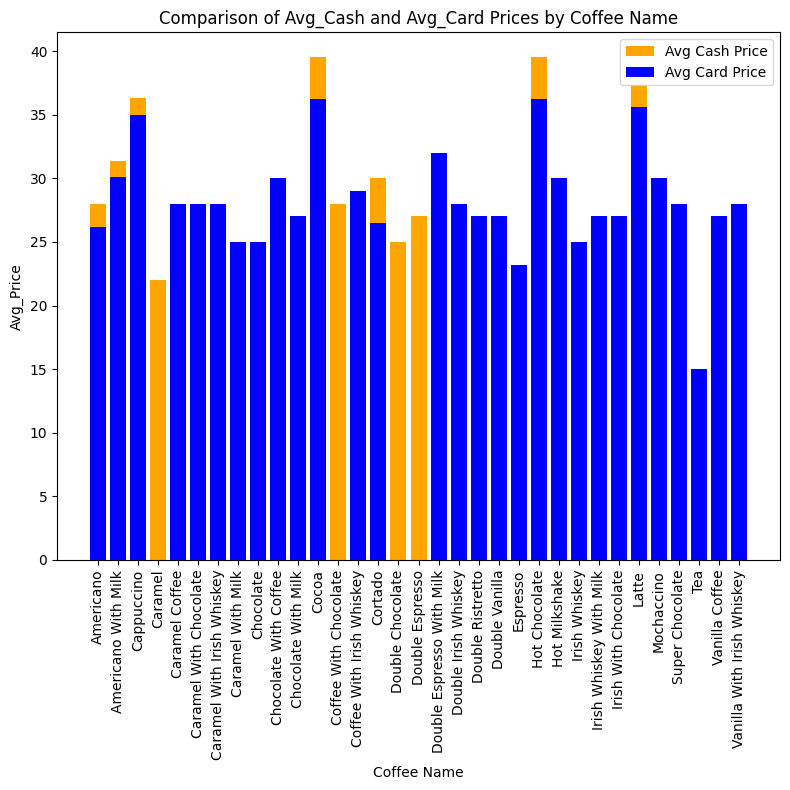

In [ ]:
plt.figure(figsize=(8,8))
plt.bar(new_df['coffee_name'],new_df['cash_prices_mean'],color='orange', label='Avg Cash Price')
plt.bar(new_df['coffee_name'],new_df['card_prices_mean'],color='blue', label='Avg Card Price')
plt.xlabel('Coffee Name')
plt.ylabel('Avg_Price')
plt.title('Comparison of Avg_Cash and Avg_Card Prices by Coffee Name')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

* **Highest prices of coffee is 40.**
* **many coffee-type is not buy by cash like caramal coffee,cramal with chocolate etc and also many coffee-type is not buy by card.**

In [ ]:
data.groupby('coffee_name')['price'].mean().round(decimals=2)

,price
coffee_name,
Americano,26.03
Americano With Milk,30.38
Cappuccino,35.80
Caramel,22.00
Caramel Coffee,28.00
Caramel With Chocolate,28.00
Caramel With Irish Whiskey,28.00
Caramel With Milk,25.00
Chocolate,25.00


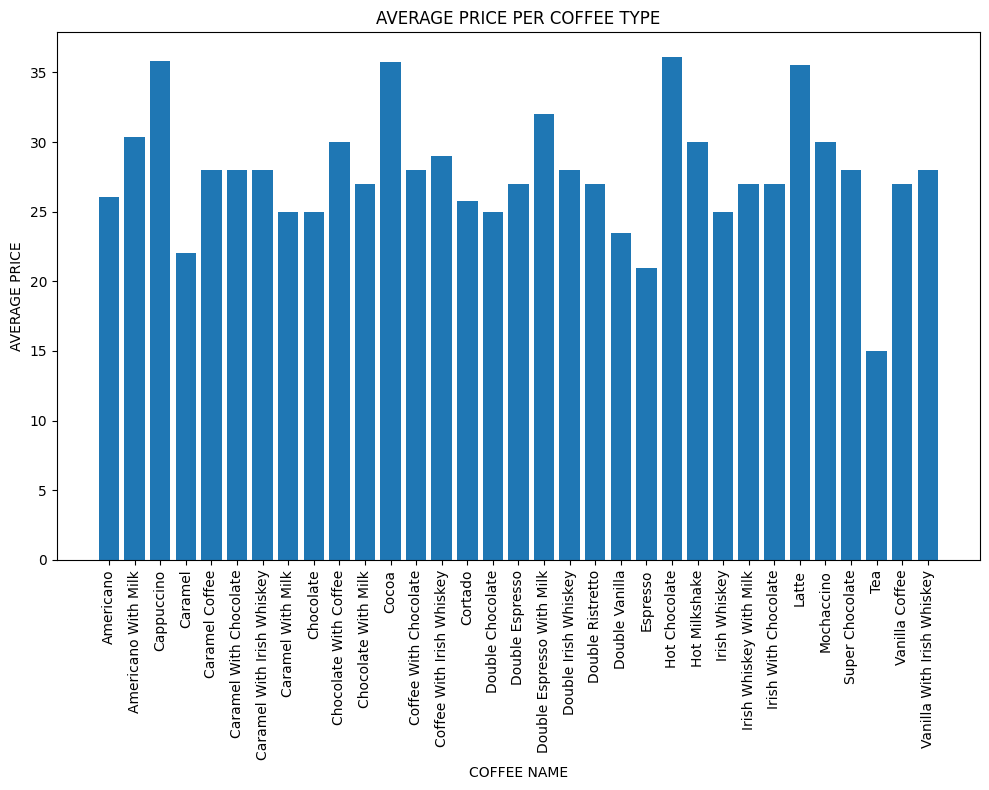

In [ ]:
plt.figure(figsize=(10,8))
coffee_avg_price = data.groupby('coffee_name')['price'].mean().round(decimals=2)
plt.bar(coffee_avg_price.index, coffee_avg_price.values)
plt.xlabel('COFFEE NAME')
plt.ylabel('AVERAGE PRICE')
plt.title('AVERAGE PRICE PER COFFEE TYPE')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**There are several prices of each coffee-type**

# Total revenue and average transaction

In [ ]:
data['price'].agg(['sum','mean'])

,price
sum,122321.5800
mean,31.3806


**Total revenue = 122321.58 and average transaction per coffee = 31.38**

# Favorite coffee

In [ ]:
data['coffee_name'].value_counts().head(n=10)

,count
coffee_name,
Americano With Milk,868
Latte,806
Americano,593
Cappuccino,516
Cortado,292
Hot Chocolate,282
Cocoa,243
Espresso,152
Irish Whiskey,20


# Revenue by date

In [ ]:
daily_revenue=data.groupby('date',sort=False).sum('price')
daily_revenue

,price
date,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2025-03-19,763.56
2025-03-20,685.60
2025-03-21,741.80


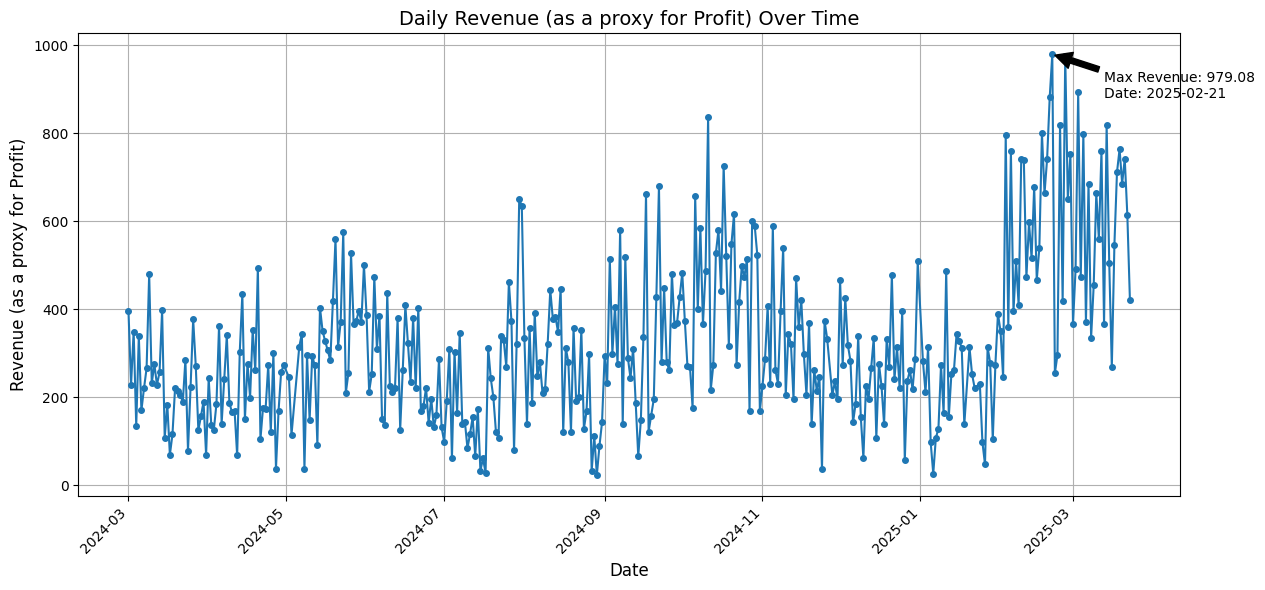

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue['price'], linestyle='-', marker='o', markersize=4)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue (as a proxy for Profit)', fontsize=12)
plt.title('Daily Revenue (as a proxy for Profit) Over Time', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

max_revenue_date = daily_revenue['price'].idxmax()
max_revenue_value = daily_revenue['price'].max()
plt.annotate(f'Max Revenue: {max_revenue_value:.2f}\nDate: {max_revenue_date.strftime("%Y-%m-%d")}',
             xy=(max_revenue_date, max_revenue_value),
             xytext=(max_revenue_date + pd.Timedelta(days=20), max_revenue_value - 100),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)

plt.show()

In [ ]:
daily_revenue.mean()

,0
price,321.054016


In [ ]:
data['hour'] = pd.to_datetime(data['time'], format='%H:%M', errors='coerce').dt.hour
df = data.groupby('hour').size().reset_index(name='sales')
df['revenue'] = data.groupby('hour')['price'].sum().values
df

,hour,sales,revenue
0,10.0,363,11357.52
1,11.0,316,9411.10
2,12.0,271,8190.62
3,13.0,240,7422.80
4,14.0,245,7705.80
5,15.0,267,8380.02
6,16.0,306,9810.84
7,17.0,268,8572.76
8,18.0,247,7965.60
9,19.0,253,8461.96


**peak selling timing is 10 to 11 with 363**

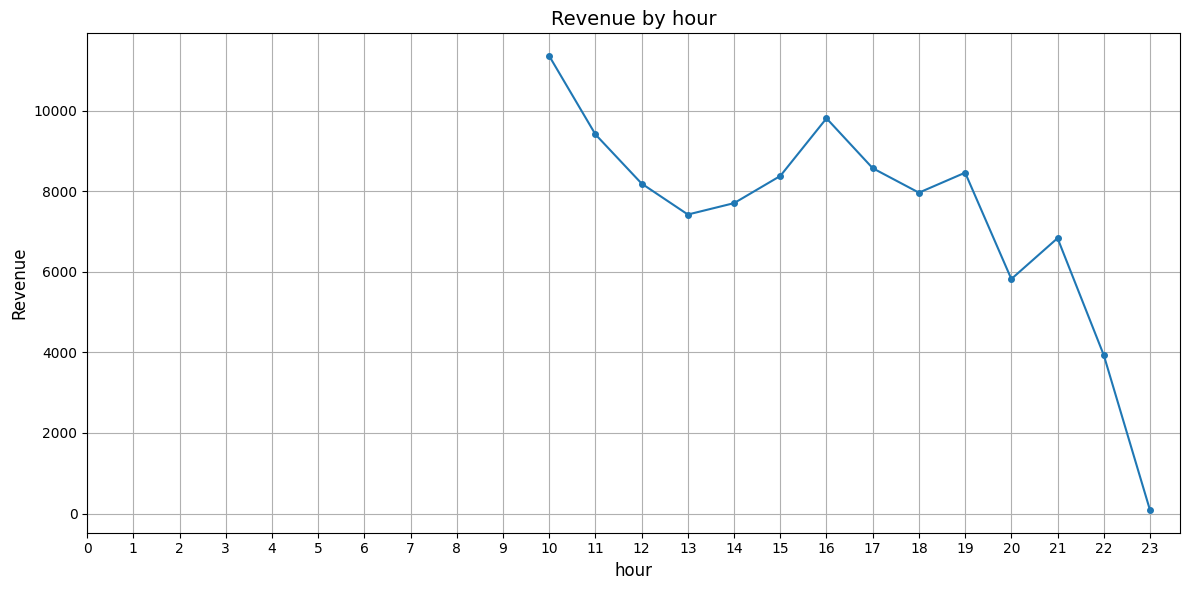

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['hour'], df['revenue'], linestyle='-', marker='o', markersize=4, label='Revenue')
plt.xlabel('hour', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Revenue by hour', fontsize=14)
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()

# Average sale amount per coffee type

In [ ]:
data.groupby('coffee_name',sort=False).mean('price').round(decimals=2)

,price
coffee_name,
Latte,35.56
Hot Chocolate,36.07
Americano,26.03
Americano With Milk,30.38
Cocoa,35.71
Cortado,25.80
Espresso,20.97
Cappuccino,35.80
Tea,15.00


# Peak selling day

In [ ]:
data['day']=data['date'].dt.day_name()
data['day'].value_counts()

,count
day,
Tuesday,604
Monday,591
Friday,586
Wednesday,553
Thursday,540
Saturday,531
Sunday,493


**Peak selling day is Tuesday with 604 sales**

# Save cleaned data as csv

In [ ]:
data.to_csv('coffee_data.csv',index=False)